>[Problem Statment](#scrollTo=7sW7a--nFWcZ)

>[Discover The project](#scrollTo=DZBJYRYLIfD_)

>>[Data analysis](#scrollTo=nW052u1P-id6)

>>[Data Preprocessing](#scrollTo=oV_9HJD6FBry)

>>>[Data cleaning](#scrollTo=c0YHEATvFPt5)

>>>[Preparing Input](#scrollTo=T8EYtipwSJnj)

>>>>[Tokenization](#scrollTo=-smwzv7XSurl)

>>[LSTM model](#scrollTo=AhXBCXJFUmPW)

>>>[Define & Evaluate the model](#scrollTo=_3uKXTWNIwy_)

>>>[Training the model](#scrollTo=Upltr1EKV_un)

>>>[Evaluate the model](#scrollTo=SzXzxNw5nnCR)

>>[BERT with TF-IDF](#scrollTo=y3c2X0TskTv_)

>>>[Why BERT](#scrollTo=IsMZeOxXjoWG)

>>>[Stemming & Extracting text data using TF-IDF](#scrollTo=IbY_TR7SnngM)

>>>[Tokenization](#scrollTo=Blxyy0eRoYlB)

>>>[Loading Deep Learning Model - > BERT](#scrollTo=L-kYT3H96H3Z)

>>>[Train BERT](#scrollTo=kSH2O3HD6ZGB)

>>[Evaluation the model](#scrollTo=L3RzRUQPMCoN)

>>[Deploy the model](#scrollTo=wagFjump1-8r)

>>[Conclution](#scrollTo=g_pXB_fQKX_F)



**Project Developer: Mostafa Magdy Hassan**

**Project Title: FAKE NEWS Detector**

**Course Name: NLP**

**In Collaboration and Supervision with:**🌐💡✨
- Dr. Hany Hanafy
- ENG. Alia El Hefnawy

#Problem Statment

**Problem Statement: Fake News Detection using NLP**

**Objective:**
Develop an efficient Natural Language Processing (NLP) model to detect fake news in the "WELFake" dataset. The goal is to create a system that accurately classifies news articles as real or fake based on their textual content.

**Tasks:**
1. Explore and preprocess the "WELFake" dataset.
2. Extract relevant features from the text for fake news detection.
3. Select and implement NLP techniques for model training.
4. Train, evaluate, and optimize the model's performance.
5. Create a user-friendly interface for practical application.

**Project Motivation**

In the jungle of information, we're on a quest to create a superhero – a Fake News Detector! Imagine having a superhero that can tell you if the news you read is real or just playing pretend. It's like giving you superhero glasses for the digital world!

Why I am doing this? Well, think about when you play detective. I want to be the detectives of the internet, exposing fake news and revealing the real deal. Our mission is to make sure you feel confident in the news you read, like having a trusty sidekick by your side.

Picture this: you, equipped with a digital sword made of fancy language tricks and smart computer skills, slashing through the confusion of fake news. We want to make the internet a place where you can trust what you read, and where everyone can be a superhero of truth!

So, if you're ready to join us on this adventure, let's create a world where the digital fog clears, and the truth shines bright – because in our story, knowing what's real is the coolest superpower! 🚀🕵️‍♂️💻

#Discover The project

Import Libreries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import tensorflow as tf

import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from keras.layers import Embedding

from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
SEED = 10

In [ ]:
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

print("Uploaded file:", file_name)

Saving archive.zip to archive.zip
Uploaded file: archive.zip


In [ ]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
df = pd.read_csv('/content/WELFake_Dataset.csv')
df.dropna(subset = ['text', 'title'], inplace = True)
df['text'] = df['title'] + ' ' + df['text']

X = df['text']
y = df['label']

In [ ]:
df.head(5)

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1  
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1  
3  Bobby Jindal, raised Hindu, uses story of Chri...      0  
4  SATAN 2: Russia unvelis an image of its terrif...      1  
5  About Time! Christian Group Sues Amazon and SP...      1

##Data analysis

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Distribution of Fake - 0 / Real - 1 News')

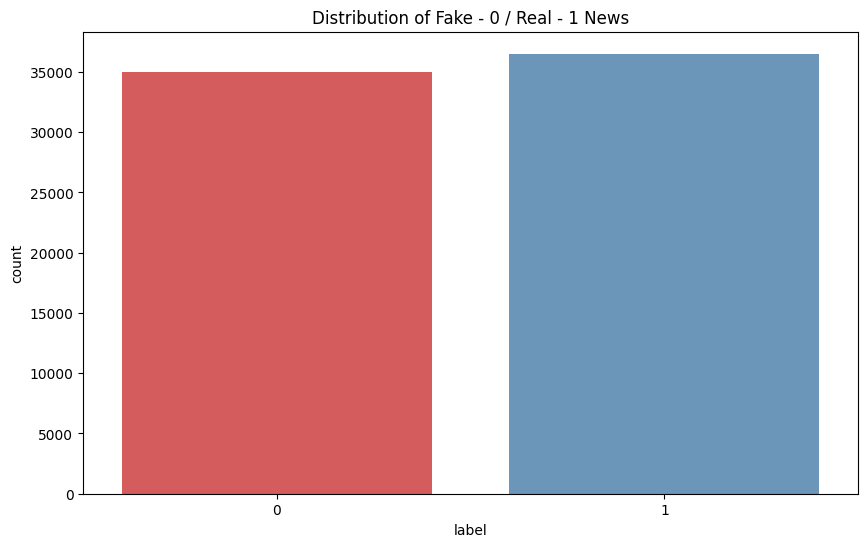

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=df['label'], palette='Set1', alpha=0.8)
plt.title('Distribution of Fake - 0 / Real - 1 News')

<ipython-input-11-edebeb150aa4>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['num_words'], bins=range(1, 3000, 50), palette='Set1', alpha=0.8)


Text(0.5, 1.0, 'Distribution of the News Words count')

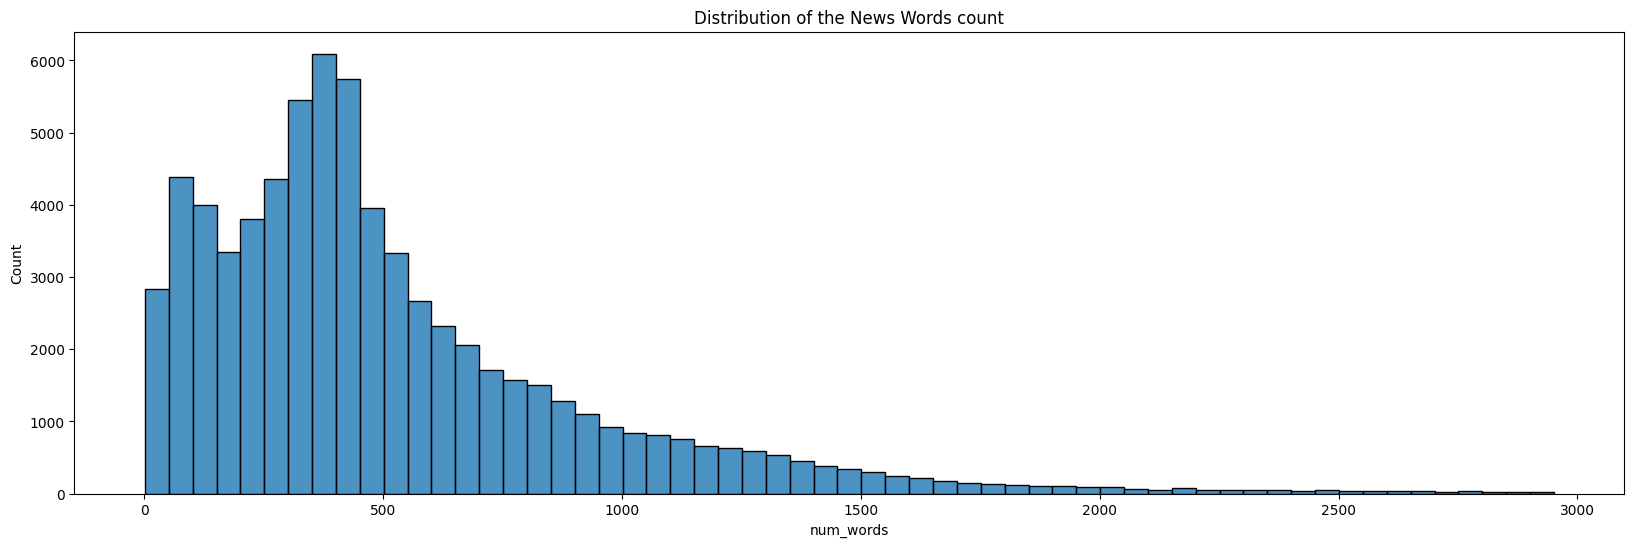

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.histplot(df['num_words'], bins=range(1, 3000, 50), palette='Set1', alpha=0.8)
plt.title('Distribution of the News Words count')

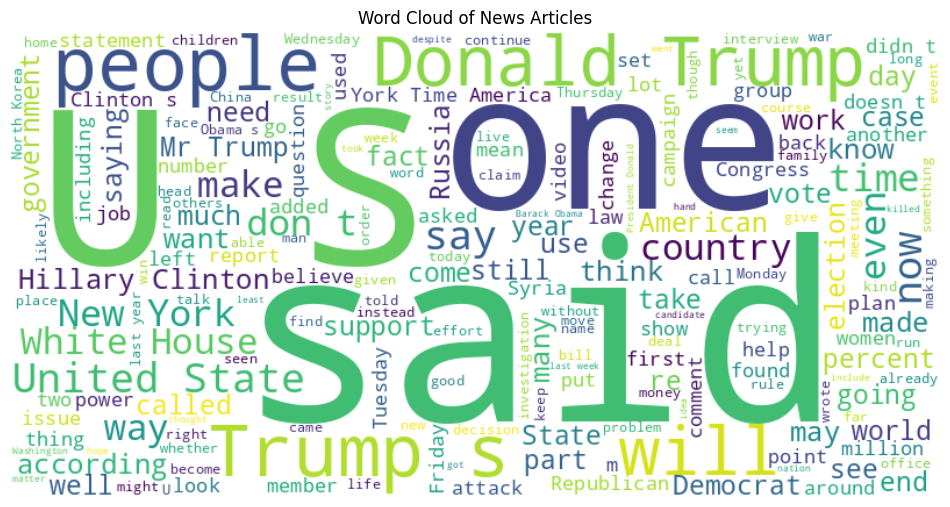

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the text in your dataset
all_text = ' '.join(df['text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Articles')
plt.show()

##Data Preprocessing

### Data cleaning

- Lowercase

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())

- remove punctuation

In [ ]:
import string

df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


- Removing Stop Words

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords') # for stopwords
nltk.download('wordnet') # for lim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_list))


- Removing Numbers:

In [ ]:
df['text'] = df['text'].apply(lambda x: ''.join(word for word in x if not word.isdigit()))


- Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

- Handling Missing Values

In [ ]:
df.dropna(subset=['text'], inplace=True)

###Preparing Input

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)

####Tokenization

In [ ]:
#define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

#return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 285418


- pad seq to fixed len, To prevent memory issues and speed up computation

In [ ]:
MAX_LEN = 512

#padded sequences
X_train_seq = sequence.pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_LEN)

In [ ]:
X_train_seq.shape[1]

512

##LSTM model

###Define & Evaluate the model

In [ ]:
#define the model
model = tf.keras.Sequential([
    Input(name='inputs',shape=[MAX_LEN]),
    Embedding(len(tok.word_index), 128),
    Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          36533504  
                                                                 
 bidirectional (Bidirection  (None, 512, 256)          263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

**- plot the model architecture**

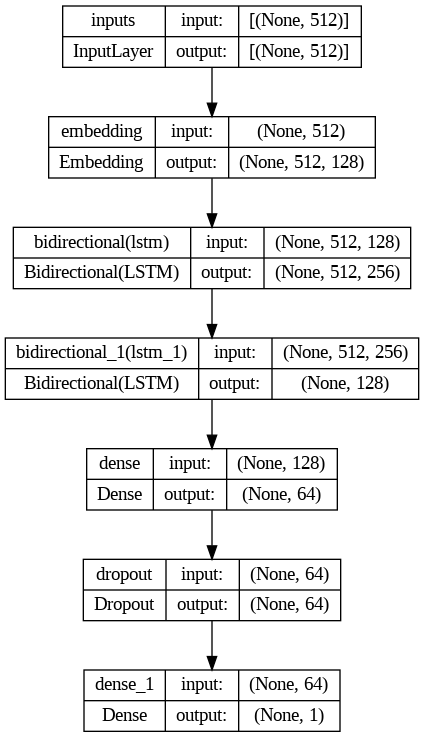

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Training the model



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    X_train_seq,            # Training data
    y_train,                # Training labels
    epochs=5,              # Number of training epochs
    validation_split=0.2,   # Fraction of training data to use for validation
    batch_size=128,          # Batch size
    callbacks=[
        EarlyStopping(
            monitor='val_accuracy',    # Metric to monitor for early stopping
            mode='max',                # Mode can be 'min', 'max', or 'auto'
            patience=3,                 # Number of epochs with no improvement after which training will be stopped
            verbose=False,              # Whether to print information about early stopping
            restore_best_weights=True   # Restore model weights from the epoch with the best value of the monitored quantity
        )
    ]
)


Epoch 1/5
336/336 [==============================] - 79s 206ms/step - loss: 0.3427 - accuracy: 0.8395 - val_loss: 0.1300 - val_accuracy: 0.9541
Epoch 2/5
336/336 [==============================] - 65s 194ms/step - loss: 0.0863 - accuracy: 0.9724 - val_loss: 0.0958 - val_accuracy: 0.9672
Epoch 3/5
336/336 [==============================] - 59s 177ms/step - loss: 0.0366 - accuracy: 0.9904 - val_loss: 0.0980 - val_accuracy: 0.9697
Epoch 4/5
336/336 [==============================] - 56s 168ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 0.1225 - val_accuracy: 0.9692
Epoch 5/5
336/336 [==============================] - 55s 164ms/step - loss: 0.0104 - accuracy: 0.9977 - val_loss: 0.1317 - val_accuracy: 0.9680


In [ ]:
# from tensorflow.keras.models import save_model
# save_model(model, 'LSModel.h5')

<ipython-input-27-ce60e067196f>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'LSModel.h5')


In [ ]:
# model.save('my_model.keras')

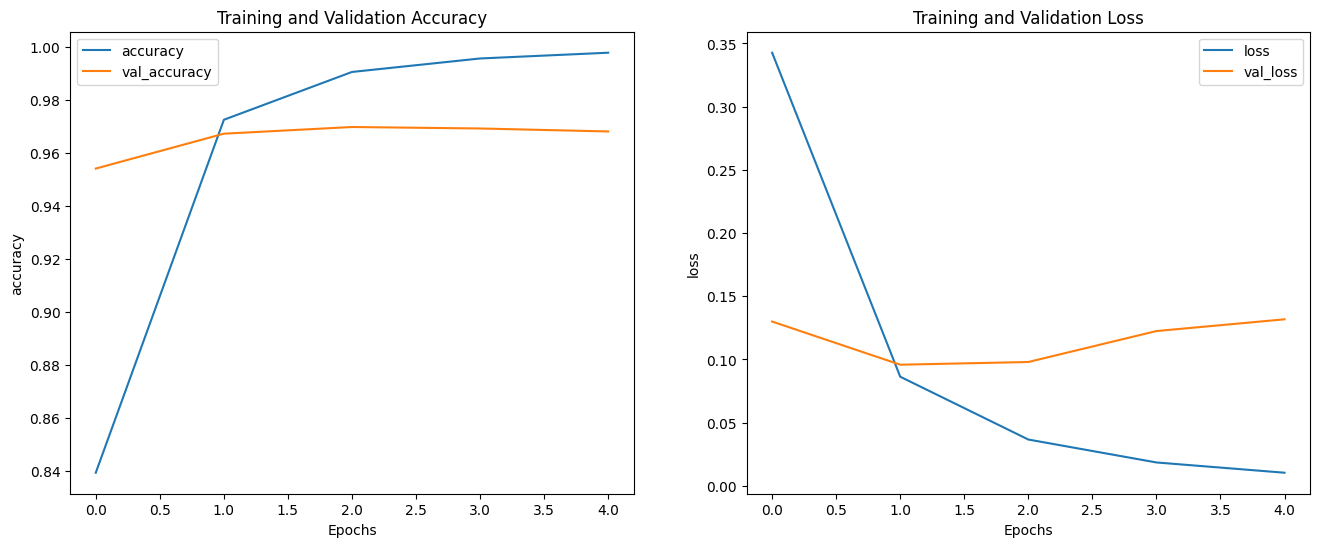

In [ ]:
# Plot the train/validation loss and accuracy
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

# Create subplots for accuracy and loss
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.title('Training and Validation Loss')

plt.show()

###Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

559/559 [==============================] - 16s 26ms/step
Test Loss: 0.1314712017774582
Test Accuracy: 0.969527542591095


In [ ]:
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8757
           1       0.98      0.96      0.97      9128

    accuracy                           0.97     17885
   macro avg       0.97      0.97      0.97     17885
weighted avg       0.97      0.97      0.97     17885



Text(70.72222222222221, 0.5, 'Real Labels')

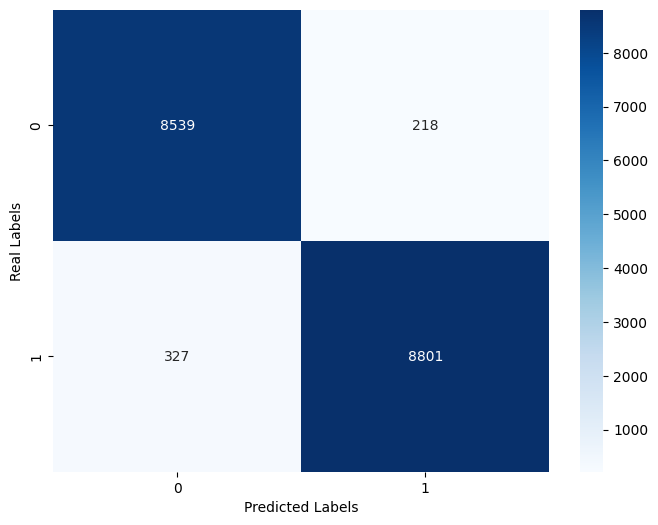

In [ ]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, np.where(y_hat >= 0.5, 1, 0)), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

##BERT with TF-IDF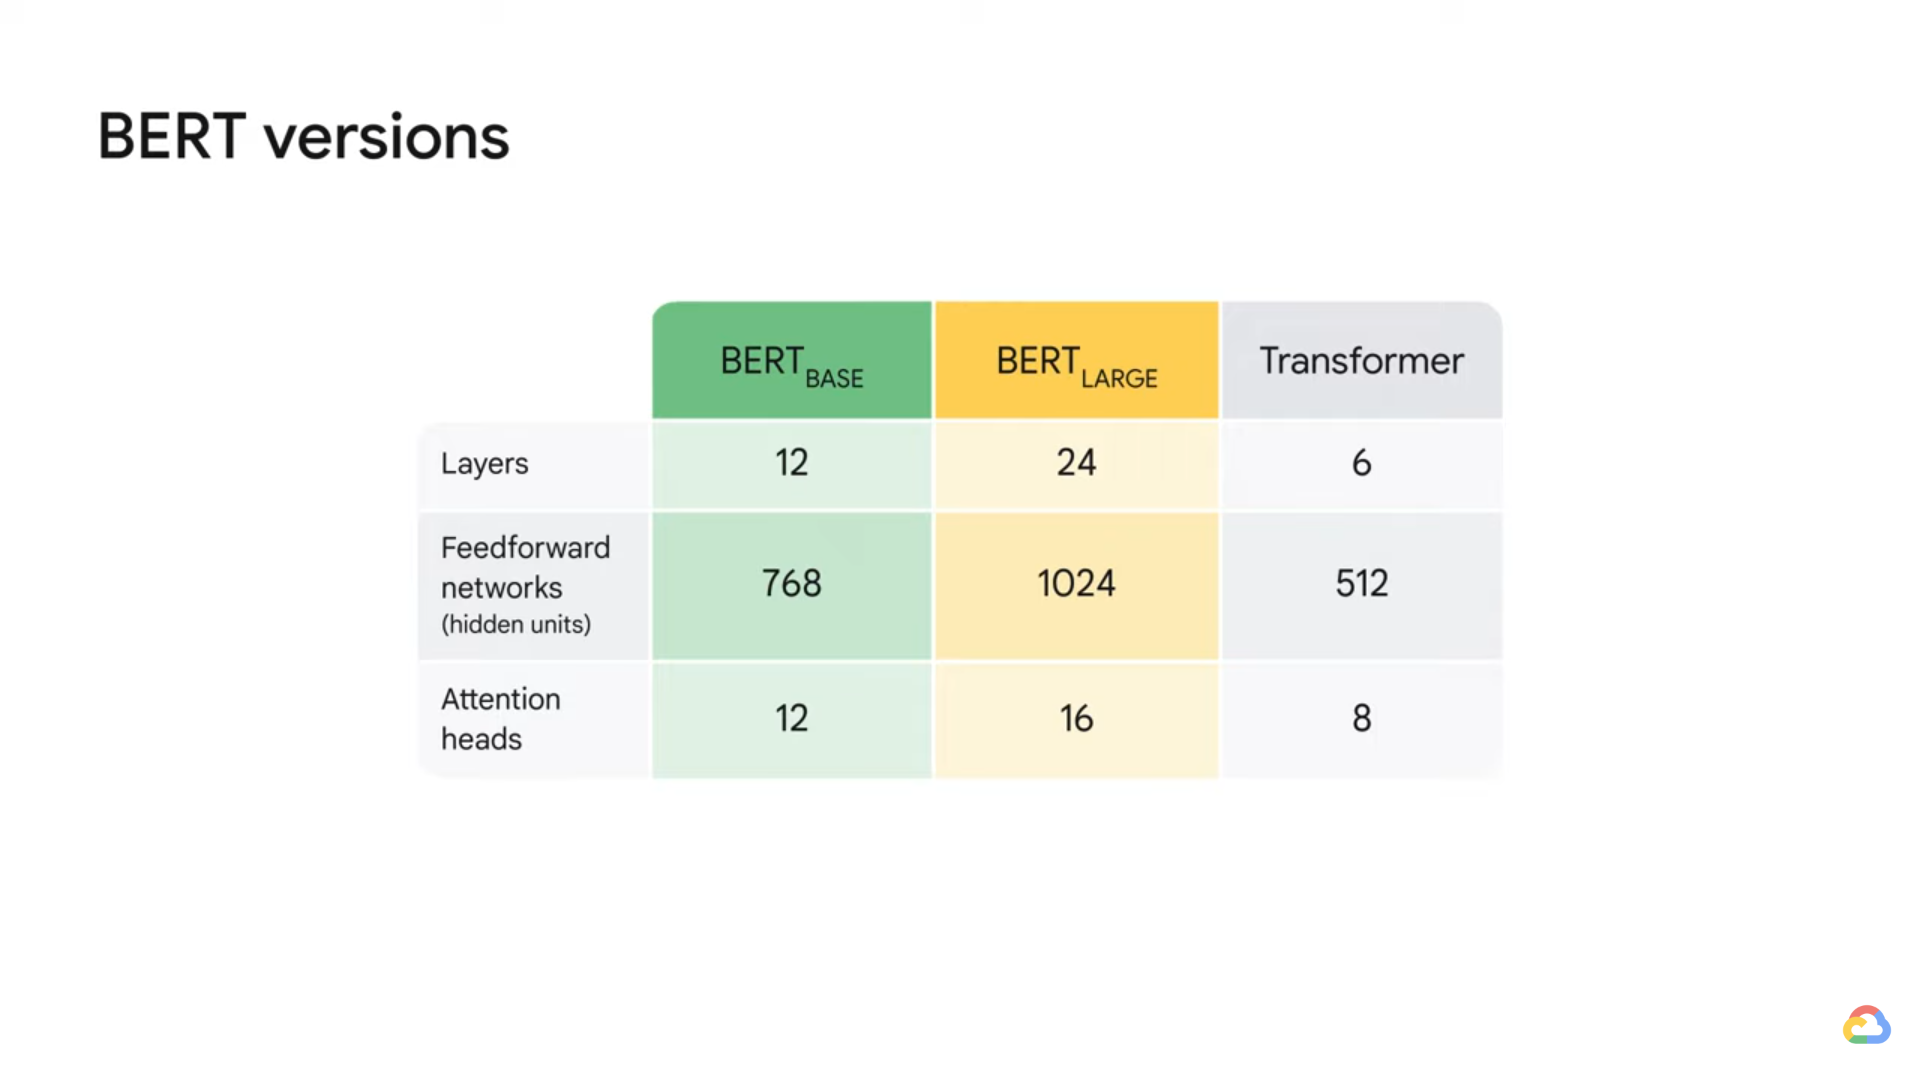

###Why BERT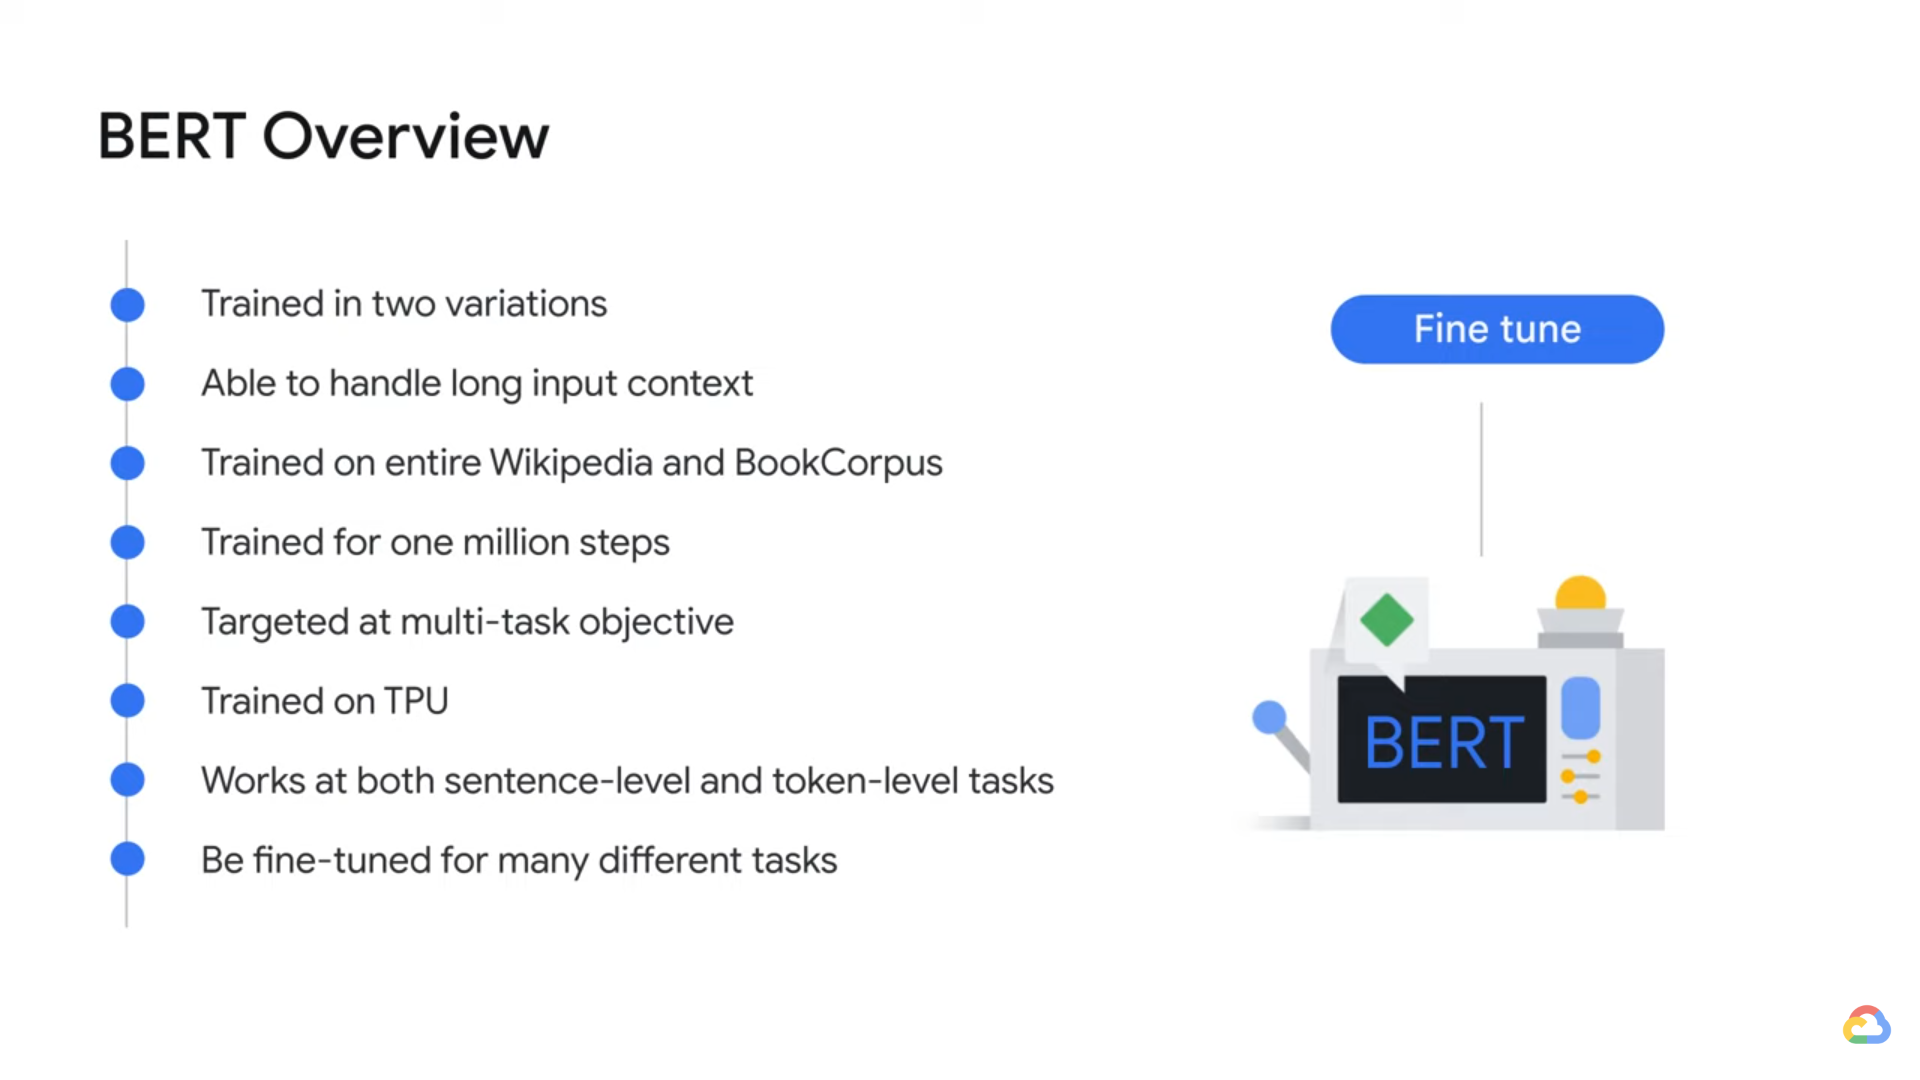

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/WELFake_Dataset.csv'


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

import seaborn as sns
from matplotlib.pylab import plt
import time
import datetime
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [ ]:
class_names = ['fake', 'real'] # 0: fake, 1: real

In [ ]:
df = df.fillna('')

In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### Stemming & Extracting text data using TF-IDF

In [ ]:
port = PorterStemmer()

def stemming(text):
    stem_text = re.sub('[^a-zA-Z]', ' ', text)
    stem_text = stem_text.lower()
    stem_text = stem_text.split()

    stem_text = [port.stem(word) for word in stem_text if not word in stopwords.words('english')]
    stem_text = ' '.join(stem_text)

    return stem_text

In [ ]:
def refinement_tfidf(text): # TF-IDF
    ex = text.split('.')
    ex = pd.DataFrame(ex)[0].apply(stemming)

    if ex[0] == '':
        return text

    vectorizer = TfidfVectorizer()
    try:
        vectorizer.fit(ex)
        features = vectorizer.transform(ex)
    except:
        return text

    feature_names = np.array(vectorizer.get_feature_names())
    feature_count = features.toarray().mean(axis=0)

    refined_text = ' '.join(feature_names[feature_count > 0.05]) # setting the importance weights according to TF-IDF

    return refined_text

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import time

# Assuming the stemming function is defined

def refinement_tfidf(text):
    sentences = text.split('.')
    stemmed_sentences = pd.DataFrame(sentences)[0].apply(stemming)

    if all(sent == '' for sent in stemmed_sentences):
        return text

    vectorizer = TfidfVectorizer()
    try:
        features = vectorizer.fit_transform(stemmed_sentences)
    except Exception as e:
        print(f"Error: {e}")
        return text

    feature_names = vectorizer.get_feature_names_out()
    feature_count = features.toarray().mean(axis=0)

    selected_features = feature_names[feature_count > 0.05]
    refined_text = ' '.join(selected_features)

    return refined_text

# Assuming df and 'text' column exist
t0 = time.time()
df['refined_tfidf'] = df['text'].apply(refinement_tfidf)
print(time.time() - t0)


Error: empty vocabulary; perhaps the documents only contain stop words
Error: empty vocabulary; perhaps the documents only contain stop words
Error: empty vocabulary; perhaps the documents only contain stop words
5038.772492408752


In [ ]:
df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                      
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                       refined_tfidf  
0                                               said  
1                          alreadi hillari post vote  
2  aka chang constitut creat demonstr eric exerci...  
3                                             jindal  
4   design dub km mile missil rs sarmat satan weapon

In [ ]:
labels = df['label'].values
texts = (df['title'] + ' ' + df['refined_tfidf']).values

### Tokenization

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
idx = np.random.choice(range(len(texts)))
print(texts[idx])
# Tokenized
print(tokenizer.tokenize(texts[idx]))
# Token to Integral
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[idx])))

Russian Report Warns: American Revolution Has Now Begun, May Last Entire Decade american elect report show sourc trump us vote win
['russian', 'report', 'warns', ':', 'american', 'revolution', 'has', 'now', 'begun', ',', 'may', 'last', 'entire', 'decade', 'american', 'elect', 'report', 'show', 'sour', '##c', 'trump', 'us', 'vote', 'win']
[2845, 3189, 19428, 1024, 2137, 4329, 2038, 2085, 5625, 1010, 2089, 2197, 2972, 5476, 2137, 11322, 3189, 2265, 14768, 2278, 8398, 2149, 3789, 2663]


In [ ]:
max_len = 0
id_len = []
for text in texts:
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    if len(input_ids) > 200:
        continue
    id_len.append(len(input_ids))
    max_len = max(max_len, len(input_ids))
print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (945 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  197


<Axes: >

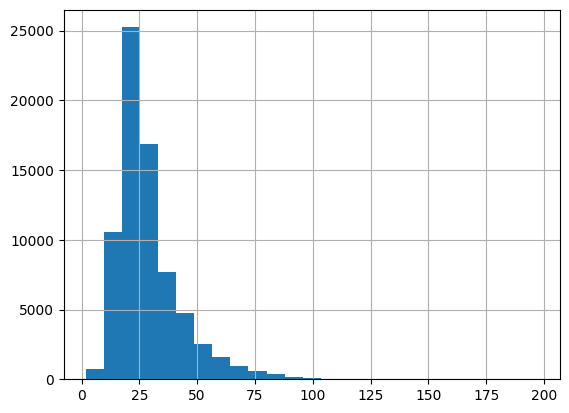

In [ ]:
pd.Series(id_len).hist(bins=25)

In [ ]:
def tokenize_map(sentence, labs='None'):
    global labels
    input_ids = []
    attention_masks = []
    for text in sentence:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens = True, # [CLS] & [SEP]
                            truncation = 'longest_first', # Control truncation
                            max_length = 100, # Max length about texts
                            pad_to_max_length = True, # Pad and truncate about sentences
                            return_attention_mask = True, # Attention masks
                            return_tensors = 'pt') # Return to pytorch tensors
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    if labs != 'None':
        labels = torch.tensor(labels)
        return input_ids, attention_masks, labels
    else:
        return input_ids, attention_masks

In [ ]:
input_ids, attention_masks, labels = tokenize_map(texts, labels)

dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
len(train_dataset.indices), len(val_dataset.indices)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-24-f6ebc5a4944a>:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labs != 'None':


(57707, 14427)

In [ ]:
batch_size = 32
num_workers = 4

train_loader = DataLoader(
                dataset=train_dataset,
                batch_size=batch_size,
                shuffle=True,
                num_workers=num_workers)

val_loader = DataLoader(
                dataset=val_dataset,
                batch_size=1,
                shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


###Loading Deep Learning Model - > BERT

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=2,
        output_attentions=False,
        output_hidden_states=False)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

**BERT-base**


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=6e-6,
                              eps=1e-8)

In [ ]:
num_epochs = 10
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

###Train BERT

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import DataLoader
from transformers import get_linear_schedule_with_warmup

# Assuming you have a defined train_dataset and train_loader

# Load pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, output_attentions=False, output_hidden_states=False)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=6e-6, eps=1e-8)
num_epochs = 10
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
model.train()
for epoch in range(num_epochs):
    total_loss = 0

    for i, (ids, masks, labels) in enumerate(train_loader):
        ids = ids.to(device)
        masks = masks.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(ids, attention_mask=masks, labels=labels)
        loss = outputs.loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

        if (i+1) % 100 == 0:
            print('{} / {}'.format(len(train_loader)*epoch + (i+1), total_steps))

    print('Epoch: {}, Loss: {:.4f}'.format(epoch+1, total_loss / len(train_loader)))

# Save the trained model
torch.save(model.state_dict(), 'nets/BERT.ckpt')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


100 / 18040
200 / 18040
300 / 18040
400 / 18040
500 / 18040
600 / 18040
700 / 18040
800 / 18040
900 / 18040
1000 / 18040
1100 / 18040
1200 / 18040
1300 / 18040
1400 / 18040
1500 / 18040
1600 / 18040
1700 / 18040
1800 / 18040
Epoch: 1, Loss: 0.2151
1904 / 18040
2004 / 18040
2104 / 18040
2204 / 18040
2304 / 18040
2404 / 18040
2504 / 18040
2604 / 18040
2704 / 18040
2804 / 18040
2904 / 18040
3004 / 18040
3104 / 18040
3204 / 18040
3304 / 18040
3404 / 18040
3504 / 18040
3604 / 18040
Epoch: 2, Loss: 0.1195
3708 / 18040
3808 / 18040
3908 / 18040
4008 / 18040
4108 / 18040
4208 / 18040
4308 / 18040
4408 / 18040
4508 / 18040
4608 / 18040
4708 / 18040
4808 / 18040
4908 / 18040
5008 / 18040
5108 / 18040
5208 / 18040
5308 / 18040
5408 / 18040
Epoch: 3, Loss: 0.0791
5512 / 18040
5612 / 18040
5712 / 18040
5812 / 18040
5912 / 18040
6012 / 18040
6112 / 18040
6212 / 18040
6312 / 18040
6412 / 18040
6512 / 18040
6612 / 18040
6712 / 18040
6812 / 18040
6912 / 18040
7012 / 18040
7112 / 18040
7212 / 18040
Epoc

RuntimeError: ignored

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'BERT.ckpt')

##Evaluation the model

In [ ]:
model.eval()
model.load_state_dict(torch.load('BERT.ckpt', map_location=device))

<All keys matched successfully>

In [ ]:
score = 0
for i, (ids, masks, labels) in enumerate(val_loader):
    ids = ids.to(device)
    masks = masks.to(device)
    labels = labels.to(device)

    g_labels = model(ids, token_type_ids=None, attention_mask=masks, labels=labels)[1]

    pred = torch.max(g_labels, 1)[1][0].item()
    gt = labels[0].item()

    score += int(pred == gt)

avg = score / len(val_dataset)
print('Accuracy: {:.4f}\n'.format(avg))

Accuracy: 0.9606



In [ ]:
for i in range(5):
    idx = np.random.choice(range(len(df)))

    print('\033[1m'+df['title'][idx]+'\n')
    print('\033[0m'+df['text'][idx])

    label = df['label'][idx]
    text = df['title'][idx] + ' ' + df['refined_tfidf'][idx]

    input_id, attention_mask = tokenize_map([text])

    g_label = model(input_id.to(device), token_type_ids=None, attention_mask=attention_mask.to(device))[0]
    pred = torch.max(g_label, 1)[1][0].item()

    print('\n')
    print('Predict: {}'.format(class_names[pred]))
    print('GT: {}'.format(class_names[label]))
    print('---------------------------------------------------------------------------------------------\n')

 Trump Makes New Racist Attack On Judge Exposing Trump University (VIDEO)

Donald Trump is very upset at the judge overseeing the ongoing lawsuit in which the allegation is being made that his Trump University was nothing more than a sophisticated scam designed to separate regular Americans from their hard earned money. Despite the Republican nominee s attempts to detract attention away from the case, new revelations keep coming out that show the reality TV star s involvement in unsavory business practices.So Trump has been lashing out at the judge, and in explicitly racist terms. Trump went there once again in an interview with the Wall Street Journal.Donald Trump is claiming that a judge with Mexican heritage who is overseeing a lawsuit against Trump University has an  inherent conflict of interest  given the presumptive GOP nominee s rhetoric on immigration.[ ] I m building a wall. It s an inherent conflict of interest,  Trump told the Journal.So what Trump is saying is that since h

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


##Deploy the model

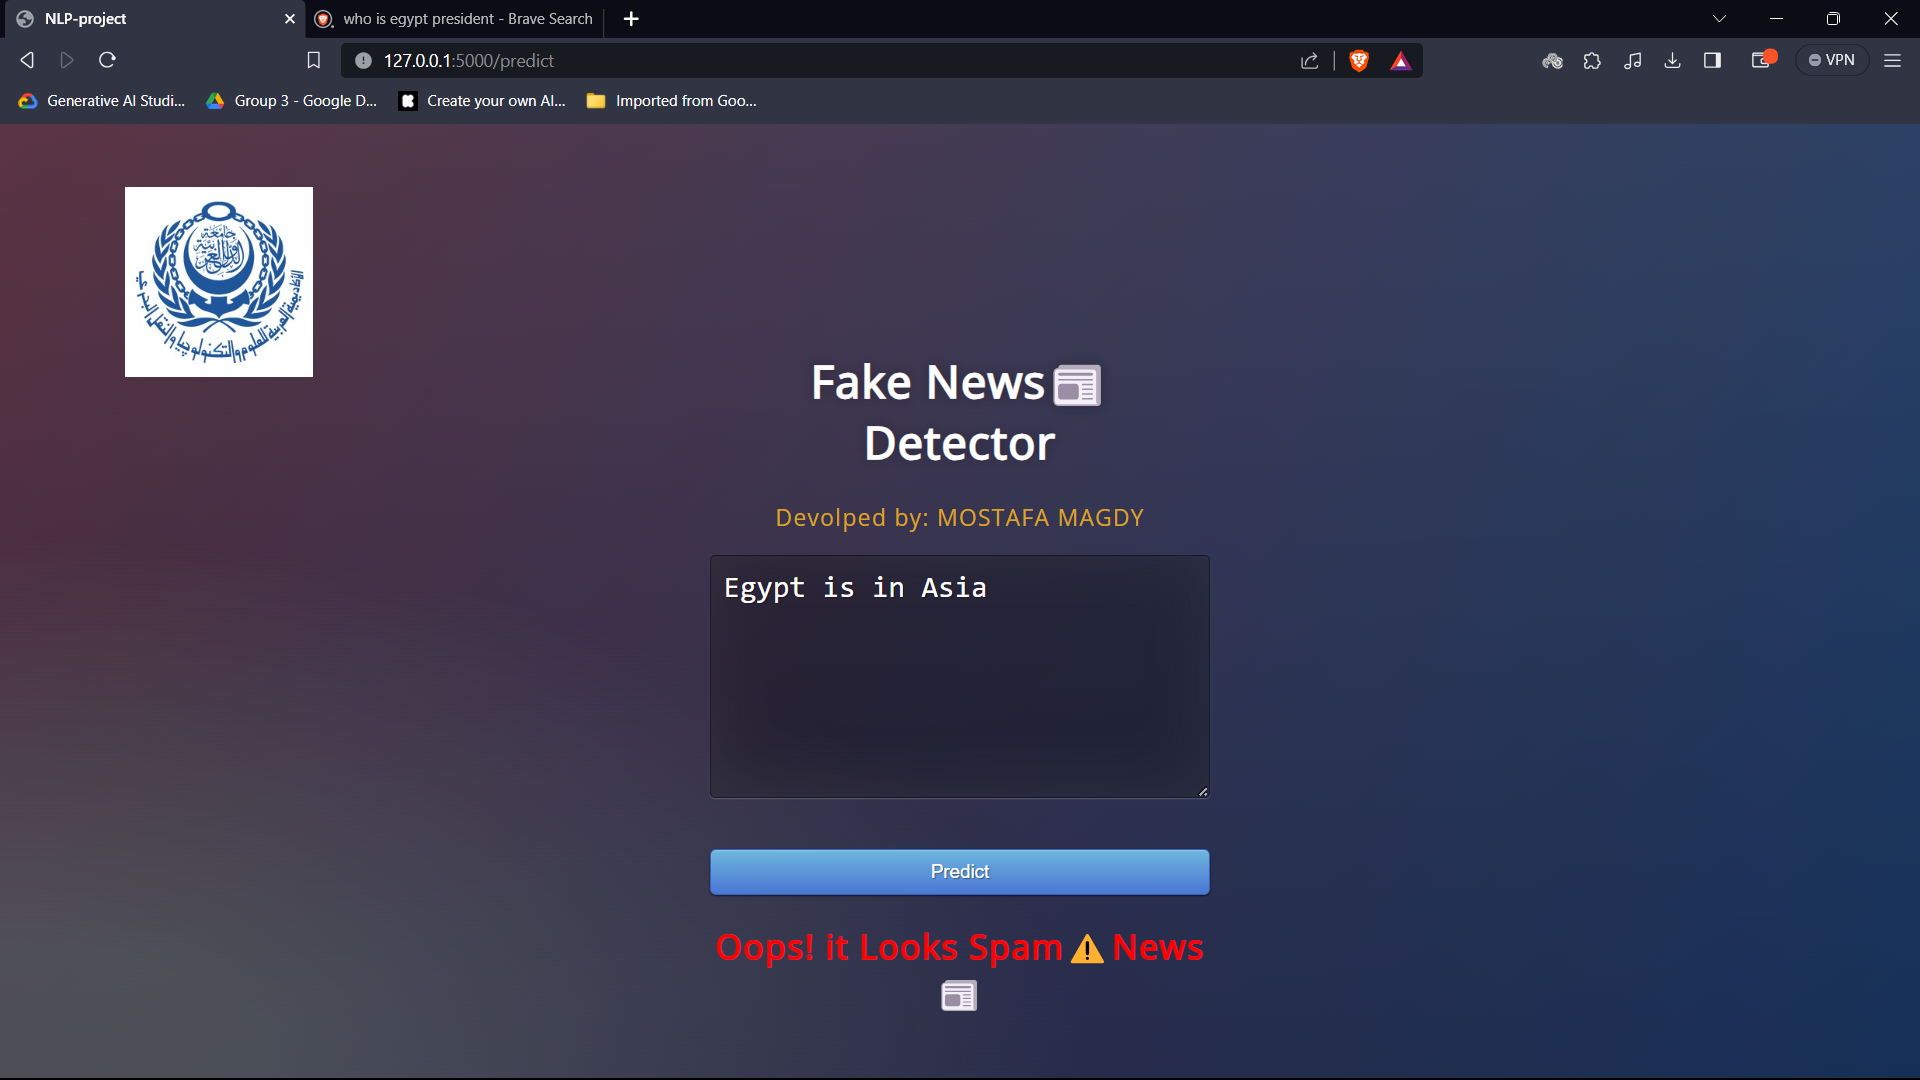

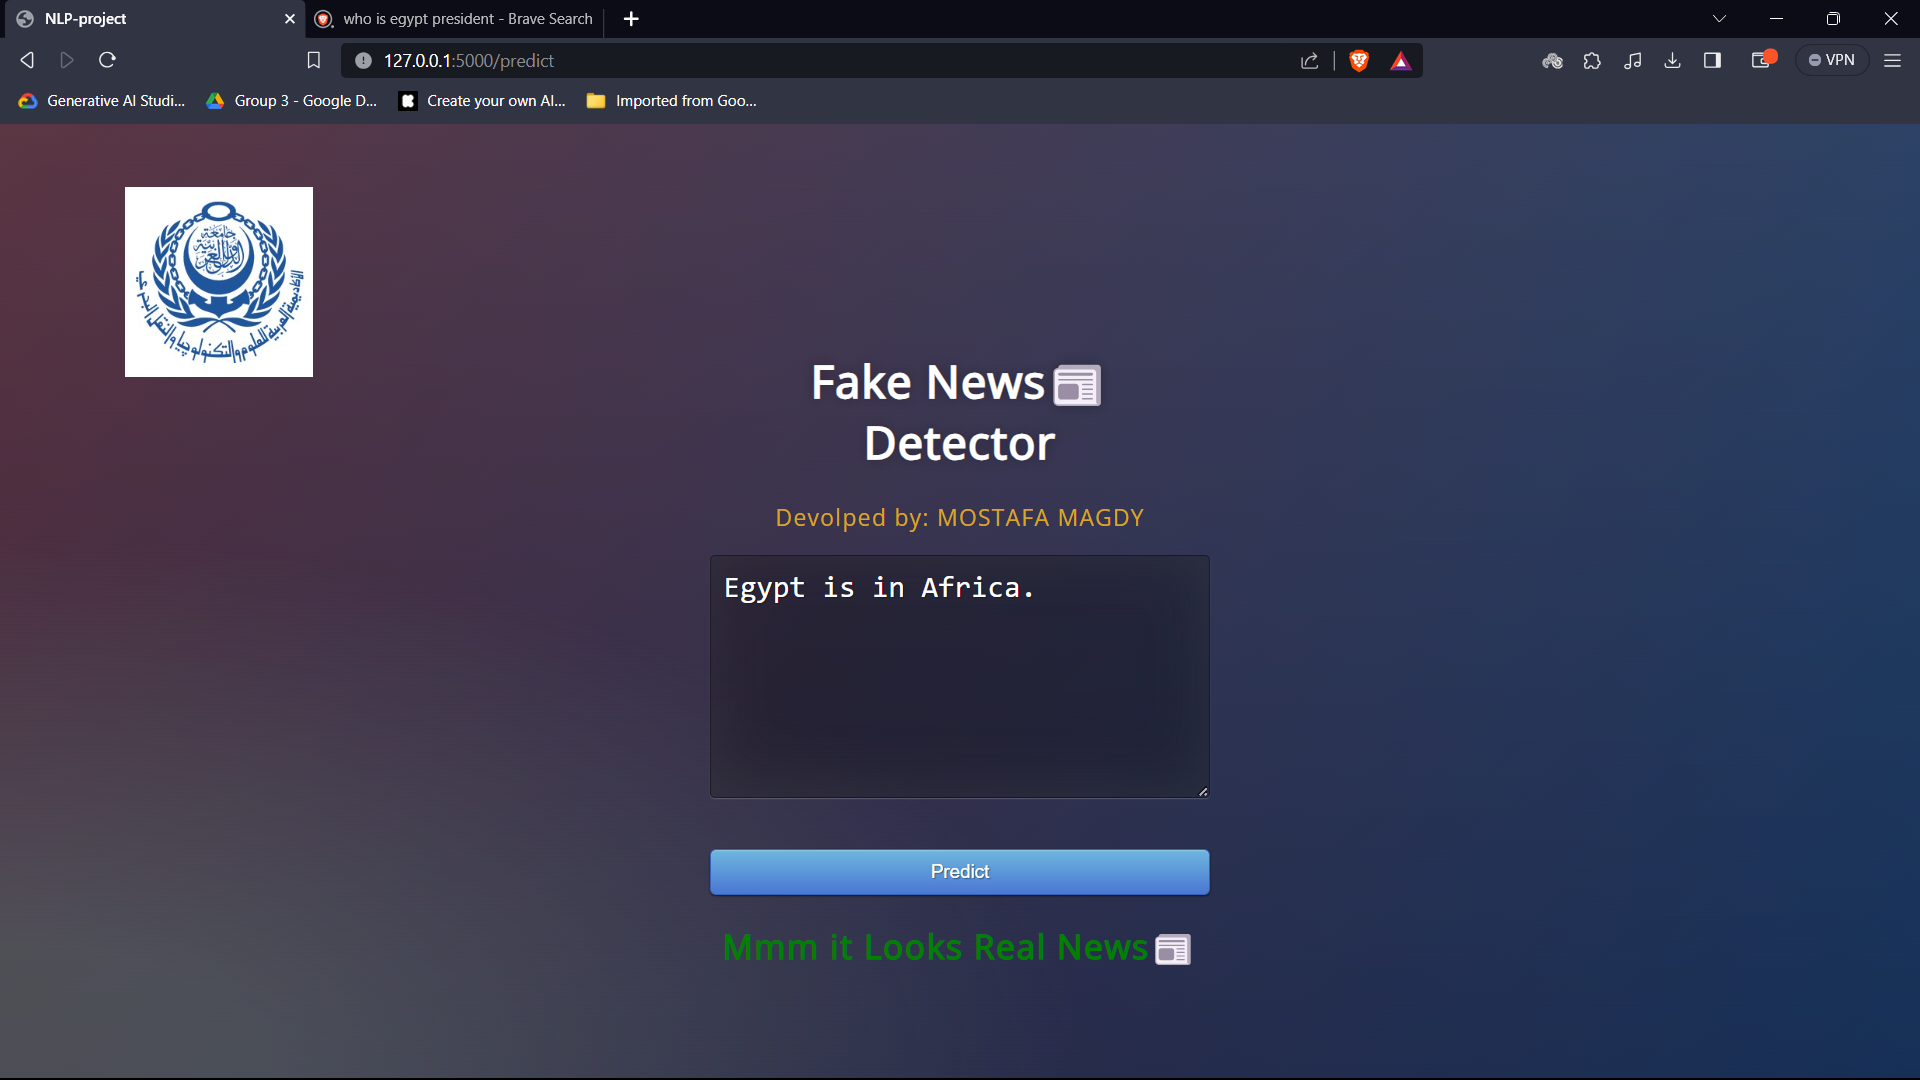

##Conclution

In the final analysis, our project tackled the fake news dilemma through two distinct strategies. **The LSTM model** showcased an impressive **97% accuracy**, relying on sequential learning to unravel patterns in textual data. Meanwhile, **the TF-IDF and BERT** transformer approach achieved a commendable **96% accuracy**, leveraging both traditional and cutting-edge techniques.